# Population of male and female adult in UK (1999-2015) 

The considered dataset is Population estimation of England, in a csv format. The file contains data about population of males and females from 0 years to 90+ years from different boroughs in the years 1999-2015.  

 To begin with import the libraries and packages used in this project.

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8.0, 6.0)

## Data Exploration

Reading the file into a dataframe.

In [4]:
pf = pd.read_csv("population-estimates-single-year-age.csv")
pf.set_index('Year')

,Code,Borough,All Persons,All Males,M 0,M 1,M 2,M 3,M 4,M 5,...,F 81,F 82,F 83,F 84,F 85,F 86,F 87,F 88,F 89,F 90+
Year,,,,,,,,,,,,,,,,,,,,,
1999,E09000001,City of London,6581,3519,24,23,22,21,20,21,...,16,15,14,13,76,-,-,-,-,-
2000,E09000001,City of London,7014,3775,25,25,24,23,22,21,...,15,15,15,13,81,-,-,-,-,-
2001,E09000001,City of London,7359,3984,17,30,25,19,21,25,...,22,18,11,10,10,14,26,16,7,15
2002,E09000001,City of London,7280,3968,29,18,28,27,20,20,...,17,22,15,9,10,7,11,26,14,20
2003,E09000001,City of London,7115,3892,35,24,16,22,26,17,...,14,15,16,16,9,2,5,10,22,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,W92000004,Wales,3063758,1504475,18645,18310,18264,18484,17902,17683,...,9976,9222,8590,8229,7620,7114,6244,5591,5310,19282
2012,W92000004,Wales,3074067,1509936,18151,18736,18370,18330,18569,17968,...,9959,9490,8700,8043,7589,6969,6423,5630,4992,20242
2013,W92000004,Wales,3082412,1515227,17667,18330,18816,18489,18389,18632,...,9955,9428,8911,8125,7408,6938,6255,5715,4951,20323


In [5]:
pf.shape

(867, 188)

In [6]:
pf.head()

,Code,Year,Borough,All Persons,All Males,M 0,M 1,M 2,M 3,M 4,...,F 81,F 82,F 83,F 84,F 85,F 86,F 87,F 88,F 89,F 90+
0,E09000001,1999,City of London,6581,3519,24,23,22,21,20,...,16,15,14,13,76,-,-,-,-,-
1,E09000001,2000,City of London,7014,3775,25,25,24,23,22,...,15,15,15,13,81,-,-,-,-,-
2,E09000001,2001,City of London,7359,3984,17,30,25,19,21,...,22,18,11,10,10,14,26,16,7,15
3,E09000001,2002,City of London,7280,3968,29,18,28,27,20,...,17,22,15,9,10,7,11,26,14,20
4,E09000001,2003,City of London,7115,3892,35,24,16,22,26,...,14,15,16,16,9,2,5,10,22,26


In [7]:
pf0.info(verbose=True, null_counts=True)

NameError: name 'pf0' is not defined

In [8]:
pf.describe()

,Year,All Persons,All Males,M 0,M 1,M 2,M 3,M 4,M 5,M 6,...,F 76,F 77,F 78,F 79,F 80,F 81,F 82,F 83,F 84,F 85
count,867.000000,8.670000e+02,8.670000e+02,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,...,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,2007.000000,5.971589e+06,2.927430e+06,37488.648212,37260.993080,37107.615917,36899.802768,36652.750865,36504.059977,36403.988466,...,22261.682814,21601.922722,20953.934256,20265.893887,19146.062284,17918.770473,16772.125721,15621.386390,14448.036909,20893.001153
std,4.901807,1.507991e+07,7.392239e+06,93742.547977,93381.483966,93182.733478,92797.538770,92265.792182,91962.865139,91777.275369,...,57098.527001,55422.977663,53799.529012,52062.967523,49236.668546,46173.475863,43257.249683,40313.865445,37298.564393,78488.339939
min,1999.000000,6.581000e+03,3.519000e+03,14.000000,11.000000,9.000000,12.000000,12.000000,13.000000,13.000000,...,15.000000,13.000000,10.000000,10.000000,11.000000,10.000000,9.000000,9.000000,9.000000,9.000000
25%,2003.000000,2.211800e+05,1.088250e+05,1607.500000,1562.000000,1519.000000,1490.500000,1455.000000,1424.500000,1402.000000,...,550.500000,535.000000,513.000000,495.500000,464.500000,431.000000,406.000000,379.500000,351.500000,333.500000
50%,2007.000000,2.847790e+05,1.412320e+05,2283.000000,2198.000000,2113.000000,2032.000000,1957.000000,1905.000000,1871.000000,...,817.000000,797.000000,772.000000,746.000000,707.000000,650.000000,609.000000,565.000000,514.000000,560.000000
75%,2011.000000,4.583081e+06,2.253170e+06,27345.500000,27423.500000,27552.000000,27692.500000,27766.500000,27793.000000,27715.000000,...,16474.000000,15990.000000,15455.500000,14830.000000,14109.000000,12971.000000,12067.500000,11162.500000,10224.000000,10253.000000
max,2015.000000,6.511003e+07,3.207444e+07,418090.000000,420940.000000,424084.000000,427117.000000,421505.000000,413235.000000,410302.000000,...,244995.000000,243760.000000,247295.000000,239387.000000,225722.000000,212706.000000,199277.000000,185352.000000,171479.000000,813109.000000


## Data Cleaning

So the dataset has 188 columns in which column 'Code' is same as 'Borough'. There is some missing values in the columns 'F 86' to 'F 90+'. The datatypes of some of columns are object which need to be formatted.The columns 'M 0' to 'M 90+'and columns 'F 0' to 'F 90+' can be grouped to different groups.

1.Replacing the values('-') in columns 'F 86' to 'F 90+' to 0. (str to int)

In [9]:
pf0 = pf.replace(['-'],[0])
#pf1

2.Next converting the datatypes of the columns to string and int datatype

In [10]:
pf0['Code'] = pf0['Code'].astype(str)
pf0['Borough'] = pf0['Borough'].astype(str)
#pf0['M 86'] = pf['M 86'].astype(int)
#pf['M 87'] = pf['M 87'].astype(int)
#pf['M 88'] = pf['M 88'].astype(int)
#pf['M 89'] = pf['M 89'].astype(int)
#pf['M 90+'] = pf['M 90+'].astype(int)
pf0['F 86'] = pf0['F 86'].astype(int)
pf0['F 87'] = pf0['F 87'].astype(int)
pf0['F 88'] = pf0['F 88'].astype(int)
pf0['F 89'] = pf0['F 89'].astype(int)
pf0['F 90+'] = pf0['F 90+'].astype(int)

3.Setting the index to 'Year'

In [11]:
pf.set_index('Year')

,Code,Borough,All Persons,All Males,M 0,M 1,M 2,M 3,M 4,M 5,...,F 81,F 82,F 83,F 84,F 85,F 86,F 87,F 88,F 89,F 90+
Year,,,,,,,,,,,,,,,,,,,,,
1999,E09000001,City of London,6581,3519,24,23,22,21,20,21,...,16,15,14,13,76,-,-,-,-,-
2000,E09000001,City of London,7014,3775,25,25,24,23,22,21,...,15,15,15,13,81,-,-,-,-,-
2001,E09000001,City of London,7359,3984,17,30,25,19,21,25,...,22,18,11,10,10,14,26,16,7,15
2002,E09000001,City of London,7280,3968,29,18,28,27,20,20,...,17,22,15,9,10,7,11,26,14,20
2003,E09000001,City of London,7115,3892,35,24,16,22,26,17,...,14,15,16,16,9,2,5,10,22,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,W92000004,Wales,3063758,1504475,18645,18310,18264,18484,17902,17683,...,9976,9222,8590,8229,7620,7114,6244,5591,5310,19282
2012,W92000004,Wales,3074067,1509936,18151,18736,18370,18330,18569,17968,...,9959,9490,8700,8043,7589,6969,6423,5630,4992,20242
2013,W92000004,Wales,3082412,1515227,17667,18330,18816,18489,18389,18632,...,9955,9428,8911,8125,7408,6938,6255,5715,4951,20323


4.Checking for any missing values in the dataset.

In [12]:
pf0.isnull().sum()

Code           0
Year           0
Borough        0
All Persons    0
All Males      0
              ..
F 86           0
F 87           0
F 88           0
F 89           0
F 90+          0
Length: 188, dtype: int64

Here there is no null values

5.Deleting a redundant column, as both 'Code' and 'Borough' columns means the same, so deleting the 'Code' column from the dataset pf0.

In [13]:
del pf0['Code']
pf0

,Year,Borough,All Persons,All Males,M 0,M 1,M 2,M 3,M 4,M 5,...,F 81,F 82,F 83,F 84,F 85,F 86,F 87,F 88,F 89,F 90+
0,1999,City of London,6581,3519,24,23,22,21,20,21,...,16,15,14,13,76,0,0,0,0,0
1,2000,City of London,7014,3775,25,25,24,23,22,21,...,15,15,15,13,81,0,0,0,0,0
2,2001,City of London,7359,3984,17,30,25,19,21,25,...,22,18,11,10,10,14,26,16,7,15
3,2002,City of London,7280,3968,29,18,28,27,20,20,...,17,22,15,9,10,7,11,26,14,20
4,2003,City of London,7115,3892,35,24,16,22,26,17,...,14,15,16,16,9,2,5,10,22,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,2011,Wales,3063758,1504475,18645,18310,18264,18484,17902,17683,...,9976,9222,8590,8229,7620,7114,6244,5591,5310,19282
863,2012,Wales,3074067,1509936,18151,18736,18370,18330,18569,17968,...,9959,9490,8700,8043,7589,6969,6423,5630,4992,20242
864,2013,Wales,3082412,1515227,17667,18330,18816,18489,18389,18632,...,9955,9428,8911,8125,7408,6938,6255,5715,4951,20323
865,2014,Wales,3092036,1521315,17324,17804,18434,18931,18586,18496,...,10163,9482,8909,8347,7512,6805,6356,5593,5068,20854


 # Grouping 

The dataset consists of single age population of Males and Females. So grouping the columns together based on gender and age range.
The age group 

0-14 years  as Children
              
15-24 years as Youth
              
25-64 years as Adult
              
65-90+ years as Senior Citizen

To start with group the columns and then drop the columns after that.

In [14]:
pf1 =  pf0.loc[:,'M 0':'M 14']
pf1['Male Children'] = pf1.sum(axis=1)
#pfdrop = pf1.drop(columns=['M 0','M 14'])
pfdrop1 = pf1.drop(pf1.loc[:,'M 0':'M 14'].head(0).columns, axis=1)
#pfdrop1

In [15]:
pf2 = pf0.loc[:,'M 15':'M 24']
pf2['Male Youth'] = pf2.sum(axis=1)
#pfdrop = pf1.drop(columns=['M 0','M 14'])
pfdrop2 = pf2.drop(pf2.loc[:,'M 15':'M 24'].head(0).columns, axis=1)
#pfdrop2

In [16]:
pf3 = pf0.loc[:,'M 25':'M 64']
pf3['Male Adult'] = pf3.sum(axis=1)
#pfdrop = pf1.drop(columns=['M 0','M 14'])
pfdrop3 = pf3.drop(pf3.loc[:,'M 25':'M 64'].head(0).columns, axis=1)
pfdrop3

,Male Adult
0,2355
1,2613
2,2871
3,2921
4,2876
...,...
862,775433
863,768726
864,766844
865,766371


In [17]:
pf4 = pf0.loc[:,'M 65':'M 90+']
pf4['Male Senior citizen'] = pf4.sum(axis=1)
#pfdrop = pf1.drop(columns=['M 0','M 14'])
pfdrop4 = pf4.drop(pf4.loc[:,'M 65':'M 90+'].head(0).columns, axis=1)
pfdrop4

,Male Senior citizen
0,476.0
1,459.0
2,442.0
3,441.0
4,447.0
...,...
862,253311.0
863,263658.0
864,271837.0
865,279514.0


In [18]:
pfmale = pd.concat([pfdrop1, pfdrop2, pfdrop3, pfdrop4], axis=1)
pfmale

,Male Children,Male Youth,Male Adult,Male Senior citizen
0,311,377,2355,476.0
1,318,385,2613,459.0
2,320,351,2871,442.0
3,323,283,2921,441.0
4,321,248,2876,447.0
...,...,...,...,...
862,266373,209358,775433,253311.0
863,266026,211526,768726,263658.0
864,266108,210438,766844,271837.0
865,266308,209122,766371,279514.0


In [19]:
pf5 = pf0.loc[:,'F 0':'F 14']
#pf5
pf5['Female Children'] = pf5.sum(axis=1)
#pfdrop = pf1.drop(columns=['M 0','M 14'])
pfdrop5 = pf5.drop(pf5.loc[:,'F 0':'F 14'].head(0).columns, axis=1)


In [20]:
pf6 = pf0.loc[:,'F 15':'F 24']
#pf5
pf6['Female Young'] = pf6.sum(axis=1)
#pfdrop = pf1.drop(columns=['M 0','M 14'])
pfdrop6 = pf6.drop(pf6.loc[:,'F 15':'F 24'].head(0).columns, axis=1)

In [21]:
pf7 = pf0.loc[:,'F 25':'F 64']
#pf5
pf7['Female Adult'] = pf7.sum(axis=1)
#pfdrop = pf1.drop(columns=['M 0','M 14'])
pfdrop7 = pf7.drop(pf7.loc[:,'F 25':'F 64'].head(0).columns, axis=1)

In [22]:
pf8 = pf0.loc[:,'F 65':'F 90+']
pf8['Female Senior citizen'] = pf8.sum(axis=1)
#pfdrop = pf1.drop(columns=['M 0','M 14'])
pfdrop8 = pf8.drop(pf8.loc[:,'F 65':'F 90+'].head(0).columns, axis=1)

In [23]:
pf0drop = pf0.drop(pf0.loc[:,'M 0':'F 90+'].head(0).columns, axis=1)

In [24]:
pffemale = pd.concat([pfmale, pfdrop5, pfdrop6, pfdrop7, pfdrop8], axis=1)
pffemale

,Male Children,Male Youth,Male Adult,Male Senior citizen,Female Children,Female Young,Female Adult,Female Senior citizen
0,311,377,2355,476.0,291,368,1892,511
1,318,385,2613,459.0,304,396,2024,515
2,320,351,2871,442.0,315,392,2145,523
3,323,283,2921,441.0,299,346,2150,517
4,321,248,2876,447.0,270,330,2127,496
...,...,...,...,...,...,...,...,...
862,266373,209358,775433,253311.0,252523,200102,793576,313082
863,266026,211526,768726,263658.0,252616,200984,788311,322220
864,266108,210438,766844,271837.0,252637,199483,786272,328793
865,266308,209122,766371,279514.0,252782,196903,785803,335233


In [25]:
pftotf = pf0[['All Females']]

In [26]:
pfupd = pf0.drop(pf0.loc[:,'M 0':'F 90+'].head(0).columns, axis=1)
pfupd

,Year,Borough,All Persons,All Males
0,1999,City of London,6581,3519
1,2000,City of London,7014,3775
2,2001,City of London,7359,3984
3,2002,City of London,7280,3968
4,2003,City of London,7115,3892
...,...,...,...,...
862,2011,Wales,3063758,1504475
863,2012,Wales,3074067,1509936
864,2013,Wales,3082412,1515227
865,2014,Wales,3092036,1521315


The final dataset after grouping different columns and data cleaning looks like

Concatenating different dataframes.

In [27]:
pfnew = pd.concat([pfupd, pftotf, pffemale], axis=1)
pfnew

,Year,Borough,All Persons,All Males,All Females,Male Children,Male Youth,Male Adult,Male Senior citizen,Female Children,Female Young,Female Adult,Female Senior citizen
0,1999,City of London,6581,3519,3062,311,377,2355,476.0,291,368,1892,511
1,2000,City of London,7014,3775,3239,318,385,2613,459.0,304,396,2024,515
2,2001,City of London,7359,3984,3375,320,351,2871,442.0,315,392,2145,523
3,2002,City of London,7280,3968,3312,323,283,2921,441.0,299,346,2150,517
4,2003,City of London,7115,3892,3223,321,248,2876,447.0,270,330,2127,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,2011,Wales,3063758,1504475,1559283,266373,209358,775433,253311.0,252523,200102,793576,313082
863,2012,Wales,3074067,1509936,1564131,266026,211526,768726,263658.0,252616,200984,788311,322220
864,2013,Wales,3082412,1515227,1567185,266108,210438,766844,271837.0,252637,199483,786272,328793
865,2014,Wales,3092036,1521315,1570721,266308,209122,766371,279514.0,252782,196903,785803,335233


Grouping the dataset by 'Years' for all the 'Boroughs'

In [28]:
pfyear = pfnew.groupby(['Year']).agg('sum')
pfyear

,All Persons,All Males,All Females,Male Children,Male Youth,Male Adult,Male Senior citizen,Female Children,Female Young,Female Adult,Female Senior citizen
Year,,,,,,,,,,,
1999,289648442,141114817,148533625,28487016,17659613,76106072,18862116.0,27142694,17378166,77428432,26584333
2000,290822167,141792035,149030132,28299288,17808306,76671967,19012474.0,26956189,17468247,78046972,26558724
2001,292105221,142606760,149498461,28064452,18132970,77155800,19253538.0,26734108,17749693,78402569,26612091
2002,293434249,143354588,150079661,27891748,18522904,77471108,19468828.0,26612605,18095877,78720010,26651169
2003,294783451,144109604,150673847,27774281,18898390,77748968,19687965.0,26489595,18508092,78976841,26699319
2004,296349132,144957597,151391535,27718287,19261354,78069769,19908187.0,26396618,18848235,79402664,26744018
2005,298731490,146194163,152537327,27655516,19533809,78861319,20143519.0,26347977,19225835,80157713,26805802
2006,300849778,147314557,153535221,27565381,19845430,79585171,20318575.0,26301708,19512716,80930372,26790425
2007,303350973,148663081,154687892,27641642,20201622,80216388,20603429.0,26356441,19781853,81638966,26910632


In [29]:
#pfshuff = pfnew.sample(frac=1)
pfnew.sample(frac=1).reset_index(drop=True)

,Year,Borough,All Persons,All Males,All Females,Male Children,Male Youth,Male Adult,Male Senior citizen,Female Children,Female Young,Female Adult,Female Senior citizen
0,1999,Westminster,189233,92410,96823,12369,13521,55951,10569.0,12454,14512,55790,14067
1,2011,Croydon,364815,176882,187933,37648,23611,96106,19517.0,36760,23542,102492,25139
2,2003,Bexley,220016,105927,114089,21835,12841,56467,14784.0,21149,12922,59744,20274
3,2008,Southwark,276973,137725,139248,25097,19721,82890,10017.0,24208,21531,80308,13201
4,2014,Hackney,263150,130713,132437,26344,14871,80877,8621.0,25401,15972,80810,10254
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,2011,Northern Ireland,1814318,889322,924996,182709,127155,463745,115713.0,173554,122899,478494,150049
863,2009,Great Britain,60467153,29653650,30813503,5441503,3985171,15919414,4307562.0,5186368,3923664,16192592,5510879
864,1999,Bexley,217458,104771,112687,22142,12274,56188,14167.0,21463,11949,59439,19836
865,2001,Islington,179387,87732,91655,15508,11352,53150,7722.0,15025,13306,53107,10217


### Data Visualization

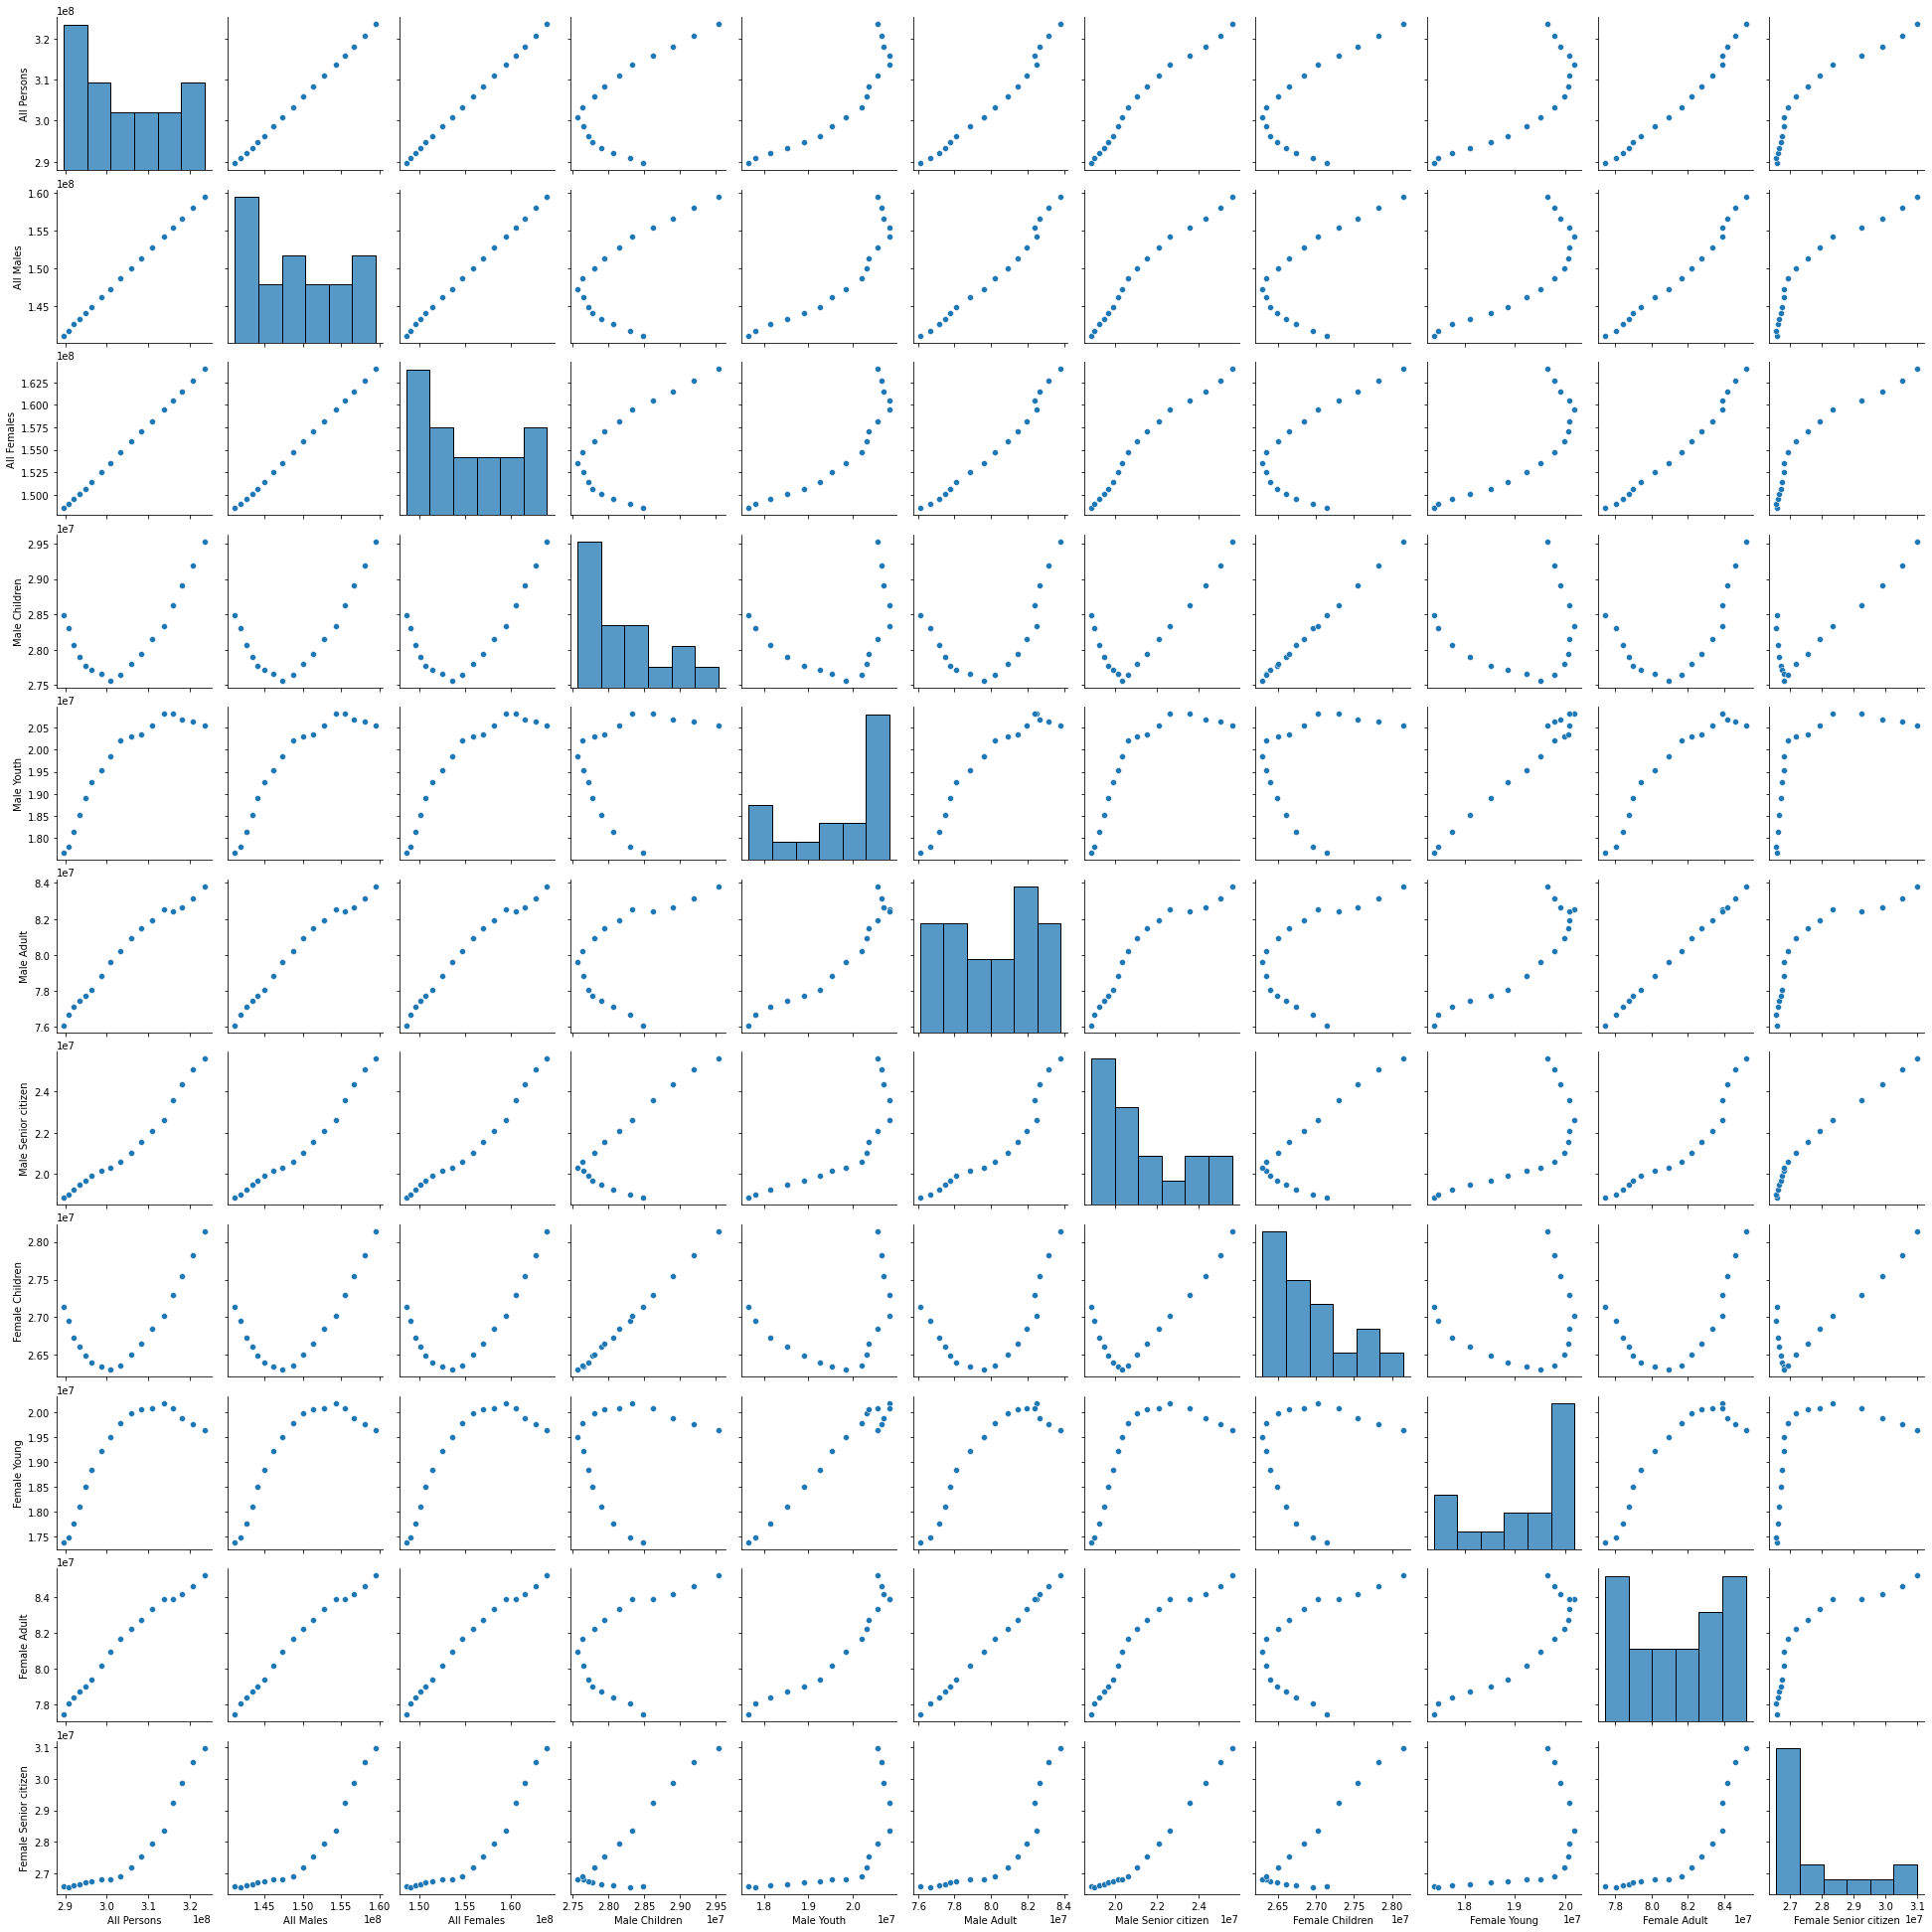

In [30]:
pairplot(pfyear)

Pairplot displays histograms and scatter plots, with histogram showing the distribution of a single variable while scatter plots displays the relationships between two variables in the dataset pfyear. Some scatter plots shows a linear relationship, while histogram shows a right skewed distribution where the mpeak of histogram veers to left, where tail is longer on the positive direction of number line.

<AxesSubplot:>

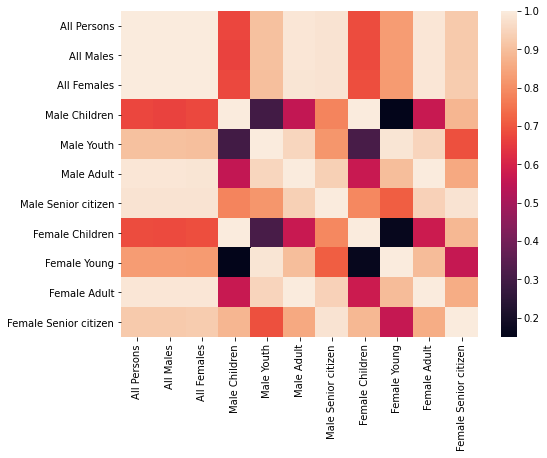

In [31]:
import seaborn as sns
sns.heatmap(pfyear.corr())

The correlation plot shows that the diagonal has value 1, which means each variable is maximally correlated with itself. This means the values in the columns tend to move together showing a strong linear relationship between two variables.

The below plot shows a linear relationship between 'Year' and 'All Persons'. 

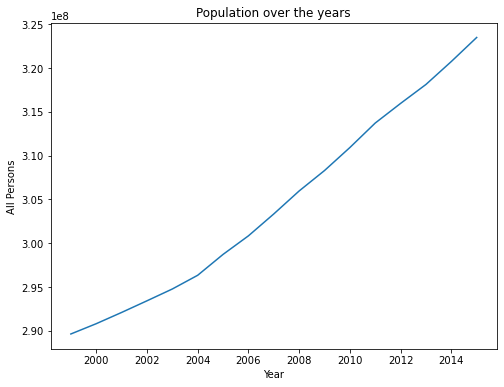

In [32]:
plt.figure()
plt.plot(pfyear["All Persons"])
plt.ylabel('All Persons')
plt.xlabel('Year')
plt.title('Population over the years')
plt.show()

## Hypothesis Formulation

Consider $H_0$ as the null hypothesis and $H_1$ as the alternative hypothesis, where

1.$H_0$ = The average 'Male Adults' is greater than or equal to ' Female Adults' from 1999 to 2015. 

2.$H_1$ = The average 'Male Adults' is less than 'Female Adults' from 1999 to 2015.

Considering the significance level =0.05.

Since the dataset size > 30, Student's t-test is considered as the test statistic to find the p-value.

## Student's t-test 

The distribution of 'Male Adult' and 'Female Adult' is given below, which is a Gaussian distribution.

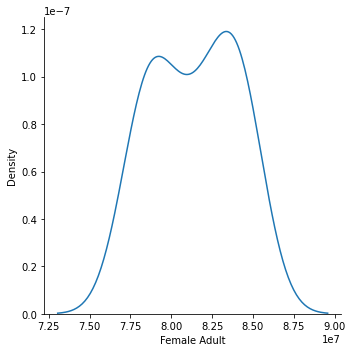

In [33]:
sns.displot( x=pfyear['Female Adult'], kind="kde")

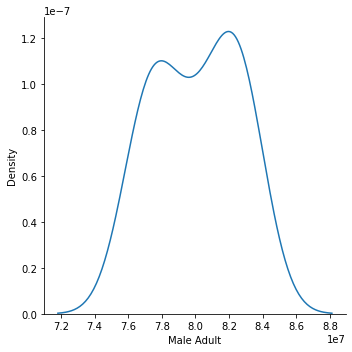

In [34]:
sns.displot(x=pfyear['Male Adult'], kind="kde")

The t-test is used for comparing the mean of data sets: either comparing the mean of a single data set to a given value, or comparing the means of two data sets.

Computing the p value with t-test, the significance level is set at 0.05.

In [35]:
stats.ttest_ind(pfnew['Male Adult'],
                pfnew['Female Adult'])

Ttest_indResult(statistic=-0.13864690178509367, pvalue=0.8897452967317306)

And now the p-value (0.889) is much greater than the significance level, 0.05. Thus the null hypotheses is not rejected. So, the average 'Male Adults' is greater to or equal to the 'Female Adults' .

## Numerical Modelling

From the population dataset, the data is splitted into X and Y variables. X being the dependent variable and Y the independent variable.

The relationship between different variables can be found by visual inspection. Here scatter plot is used to identify relationship between the variables. 

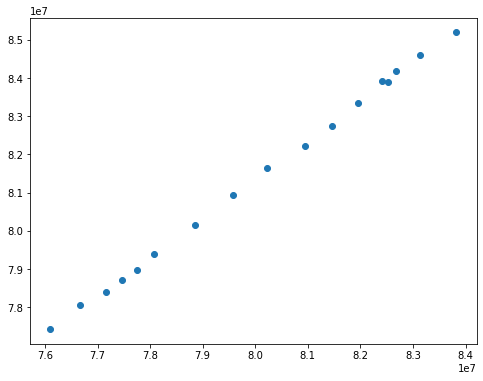

In [36]:
plt.scatter(pfyear['Male Adult'],pfyear['Female Adult'])

The scatterplot shows the linear relationship between 'Male Adult' and 'Female Adult'.

In [39]:
pfyear['Male Adult']

Year
1999    76106072
2000    76671967
2001    77155800
2002    77471108
2003    77748968
2004    78069769
2005    78861319
2006    79585171
2007    80216388
2008    80936651
2009    81466510
2010    81948703
2011    82518082
2012    82406850
2013    82671235
2014    83128336
2015    83822856
Name: Male Adult, dtype: int64

In [40]:
pfyear['Female Adult']

Year
1999    77428432
2000    78046972
2001    78402569
2002    78720010
2003    78976841
2004    79402664
2005    80157713
2006    80930372
2007    81638966
2008    82210669
2009    82744610
2010    83335800
2011    83889322
2012    83912195
2013    84182985
2014    84603424
2015    85191828
Name: Female Adult, dtype: int64

To start with modelling import the statsmodel

In [42]:
# Import the formula tools
import statsmodels.formula.api as smf

x = pfyear['Female Adult']
y = pfyear['Male Adult']

# Create the linear regression model object ("ols" stands for ordinary least squares)
model = smf.ols(data = pfyear, formula = "y ~ x")

# Create a RegressionResults object
result = model.fit()

In [43]:
result.summary()

/Users/rohith/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.039e+04
Date:                Tue, 25 May 2021   Prob (F-statistic):           6.37e-25
Time:                        19:41:37   Log-Likelihood:                -212.84
No. Observations:                  17   AIC:                             429.7
Df Residuals:                      15   BIC:                             431.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.16e+05   5.58e+05      0.746      0.467   -7.73e+05    1.61e+06
x              0.9783      0.007    142.794      0.000       0.964       0.993
==============================================================================
Omnibus:                        3.018   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                1.196
Skew:                          -0.108   Prob(JB):                        0.550
Kurtosis:                       1.719   Cond. No.                     2.66e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The 'Female Adult' Vs 'Male Adult' with R-squared value = 0.97 shows a better fit to the model as it is close to 1.

## Model Evaluation

Model validation is done by forming a training set to from a model and a test set to evaluate the model

In [252]:
from sklearn import model_selection, metrics

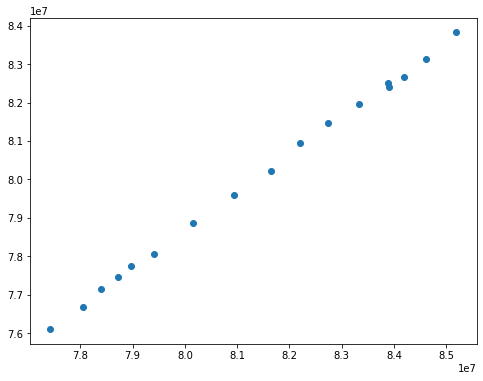

In [253]:
x = pfyear['Female Adult']
y = pfyear['Male Adult']
plt.scatter(x,y)


In [255]:
pfmod = pd.DataFrame({'Female Adult':x,'Male Adult':y})
pfmod

,Female Adult,Male Adult
Year,,
1999,77428432,76106072
2000,78046972,76671967
2001,78402569,77155800
2002,78720010,77471108
2003,78976841,77748968
2004,79402664,78069769
2005,80157713,78861319
2006,80930372,79585171
2007,81638966,80216388


In [256]:
train1, test1 = model_selection.train_test_split(pfmod, random_state=46)

In [257]:
len(test1)/(len(train1)+len(test1))

0.29411764705882354

In [258]:
train1

,Female Adult,Male Adult
Year,,
2008,82210669,80936651
2005,80157713,78861319
2012,83912195,82406850
2014,84603424,83128336
2010,83335800,81948703
1999,77428432,76106072
2001,78402569,77155800
2002,78720010,77471108
2009,82744610,81466510


In [259]:
test1

,Female Adult,Male Adult
Year,,
2000,78046972,76671967
2006,80930372,79585171
2015,85191828,83822856
2013,84182985,82671235
2011,83889322,82518082


In [260]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(train1['Female Adult'],train1['Male Adult'])

In [261]:
slope

0.9729389296080432

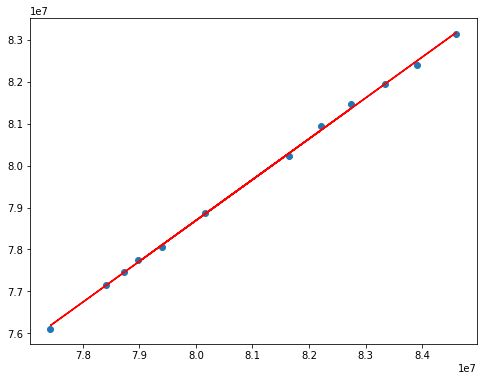

In [262]:
train_regr = intercept + slope * train1['Female Adult']
plt.scatter(train1['Female Adult'],train1['Male Adult'])
plt.plot(train1['Female Adult'],train_regr, color='red');

Computing the  𝑅2 and MAE for the model on the training set:

In [264]:
metrics.r2_score(train1['Male Adult'], train_regr)

0.9992144947522484

In [265]:
metrics.mean_absolute_error(train1['Male Adult'], train_regr)

54225.199840423964

In [ ]:
Computing the 𝑅2 and MAE for the model on the test set:

In [266]:
metrics.r2_score(test1['Male Adult'], intercept + slope*test1['Female Adult'])

0.9990929291568266

In [267]:
metrics.mean_absolute_error(test1['Male Adult'], intercept + slope*test1['Female Adult'])

68638.55894460678

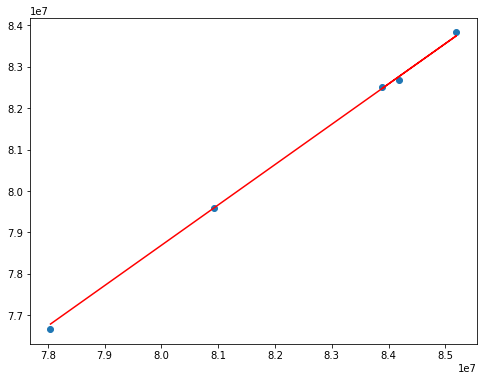

In [268]:
train_regr = intercept + slope * train1['Female Adult']

plt.scatter(test1['Female Adult'],test1['Male Adult'])
plt.plot(test1['Female Adult'],intercept + slope*test1['Female Adult'], color='red');

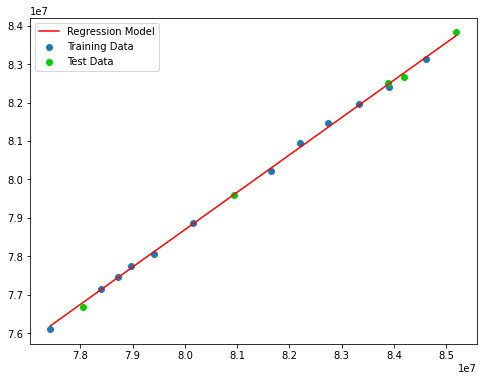

In [269]:
plt.scatter(train1['Female Adult'],train1['Male Adult'],label='Training Data')
plt.scatter(test1['Female Adult'],test1['Male Adult'],color='#00CC00',label='Test Data')
plt.plot(x,intercept + slope*x, color='red',label='Regression Model')
plt.legend();

In [270]:
print('R-squared value is', metrics.r2_score(y, intercept + slope*x))
print('MAE is', metrics.mean_absolute_error(y, intercept + slope*x))
print('Mean and std are', pfyear['Male Adult'].mean(), pfyear['Male Adult'].std())

R-squared value is 0.9992296903657343
MAE is 58464.42310636008
Mean and std are 80046222.64705883 2518564.1841798956


## Conclusion

 The inspection of graph combined with high 𝑅2 value shows this to be a better model to the dataset.